# 第二章第八节 讨论题：
@ alxbj  
@ 7961159@qq.com  

题目要求：感兴趣的同学可根据提供的学生体侧数据，利用所学数据分析技术发掘数据中隐含的规律，撰写研究报告。可自行编程，也可利用数据挖掘工具和算法包。 提示： 
1. 可以研究各属性对性别的区分度。 
2. 注意数据清洗。

### 按照课程章节安排数据分析步骤：  
#### 一、数据清洗  
1.异常值与重复数据检测  
2.类型转换与采样  
#### 二、数据描述与可视化  （贯穿在数据清洗的各个步骤，不做单独展示）
#### 三、特征选择  
1.主成分分析 PCA  (Principal Component Analysis)   
2.线性判别分析 LDA(Linear Discriminant Analysis)  

### 导入数据

In [111]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore') #忽略警告信息；
student_data = pd.read_excel('data/数据.xlsx')
student_data.head(7)

,编号,性别,年龄,身高,体重,细胞内液,细胞外液,肌肉重,蛋白质,瘦体重,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,0,1,23,155.2,54.0,18.3,8.9,34.9,7.7,37.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,25,178.0,60.3,27.3,13.3,52.0,11.5,55.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,23,155.0,54.0,18.5,8.9,35.1,7.7,37.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,0,22,168.5,54.5,23.7,11.2,44.7,9.8,47.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,0,23,175.1,66.9,27.6,13.3,52.4,11.5,55.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29,0,23,157.7,56.3,22.4,10.1,41.6,9.2,44.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30,1,21,157.4,50.3,18.8,9.1,35.7,7.9,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 数据预处理 删除冗余数据 / 缺失值处理 / 重复值

In [112]:
student_data.shape #数据预处理前共有488行，70列

(488, 70)

In [113]:
#删除冗余
student_data.drop(list(student_data)[38:70], axis=1,inplace=True)   # 删除38：70列的错误信息
student_data.reset_index()#重置index
student_data.shape #删除后剩下 488行/38列

(488, 38)

In [114]:
#缺失值处理 
#using isnull() function to check NaN value 
# 无缺失值 
#缺失值处理原则：删除，填充（均值，众数，中位数，前后相邻值），插值（拉格朗日插值，牛顿插值）  
student_data.isnull().sum()

编号         0
性别         0
年龄         0
身高         0
体重         0
细胞内液       0
细胞外液       0
肌肉重        0
蛋白质        0
瘦体重        0
无机盐        0
脂肪重        0
脂肪百分比      0
腰臀比        0
肥胖度        0
体质指数       0
肌肉控制       0
脂肪控制       0
体重控制       0
标准体重       0
目标体重       0
基础代谢率      0
躯干肌肉       0
躯干骨质       0
躯干脂肪       0
躯干脂肪百分比    0
左上肢肌肉      0
左上肢骨质      0
左上肢脂肪      0
右上肢肌肉      0
右上肢骨质      0
右上肢脂肪      0
左下肢肌肉      0
左下肢骨质      0
左下肢脂肪      0
右下肢肌肉      0
右下肢骨质      0
右下肢脂肪      0
dtype: int64

In [115]:
# 重复值判断
student_data.duplicated().value_counts() #用duplicated()方法进行逻辑判断，确定是否有重复值

False    488
dtype: int64

In [116]:
#数据预处理完成，感觉这个数据还是比较干净的...
student_data.head(3)

,编号,性别,年龄,身高,体重,细胞内液,细胞外液,肌肉重,蛋白质,瘦体重,...,左上肢脂肪,右上肢肌肉,右上肢骨质,右上肢脂肪,左下肢肌肉,左下肢骨质,左下肢脂肪,右下肢肌肉,右下肢骨质,右下肢脂肪
0,0,1,23,155.2,54.0,18.3,8.9,34.9,7.7,37.4,...,1.2,2.5,0.2,1.2,6.3,0.5,3.0,6.1,0.5,2.9
1,0,0,25,178.0,60.3,27.3,13.3,52.0,11.5,55.6,...,0.3,3.8,0.3,0.3,9.1,0.6,0.8,9.4,0.6,0.8
2,0,1,23,155.0,54.0,18.5,8.9,35.1,7.7,37.7,...,1.2,2.5,0.2,1.1,5.9,0.4,2.8,6.5,0.5,3.0


### 一、数据清洗  
1.异常值检测与处理

In [117]:
#用describe()对特征值进行描述性统计分析
df = student_data.drop(student_data[['编号','性别']], axis=1)
df.describe() 

,年龄,身高,体重,细胞内液,细胞外液,肌肉重,蛋白质,瘦体重,无机盐,脂肪重,...,左上肢脂肪,右上肢肌肉,右上肢骨质,右上肢脂肪,左下肢肌肉,左下肢骨质,左下肢脂肪,右下肢肌肉,右下肢骨质,右下肢脂肪
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,23.448770,168.072746,60.569672,24.232172,11.629713,45.974795,10.114754,49.186066,3.211270,11.383197,...,0.821721,3.232172,0.228074,0.821311,25.536475,0.567213,2.055738,8.557582,0.679098,2.076230
std,2.163122,7.592749,10.781703,4.563682,2.107111,8.528057,1.875659,9.012559,0.487056,4.439759,...,0.325790,1.581441,0.116109,0.323223,385.001282,0.093916,1.234999,7.397440,2.284492,1.132663
min,18.000000,148.700000,35.000000,15.400000,7.600000,29.500000,6.500000,31.700000,2.300000,-2.600000,...,0.100000,-28.700000,-2.100000,0.100000,5.200000,0.400000,0.100000,5.300000,0.400000,0.100000
25%,22.000000,162.000000,53.000000,20.075000,9.875000,38.450000,8.475000,41.250000,2.800000,8.275000,...,0.600000,2.700000,0.200000,0.600000,6.800000,0.500000,1.500000,6.800000,0.500000,1.500000
50%,23.000000,169.000000,60.000000,24.450000,11.600000,46.350000,10.200000,49.600000,3.200000,11.000000,...,0.800000,3.300000,0.200000,0.800000,8.200000,0.600000,1.900000,8.300000,0.600000,2.000000
75%,24.000000,173.925000,67.000000,27.525000,13.200000,52.200000,11.500000,55.700000,3.600000,13.600000,...,1.000000,3.800000,0.300000,1.000000,9.200000,0.600000,2.400000,9.400000,0.600000,2.400000
max,35.000000,188.000000,110.000000,40.000000,19.000000,75.600000,16.600000,80.500000,4.900000,42.700000,...,3.200000,5.500000,0.400000,3.000000,8513.000000,1.000000,23.000000,168.000000,51.000000,20.000000


In [118]:
#异常值检测
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False     # 解决保存图像是负号'-'显示为方块的问题

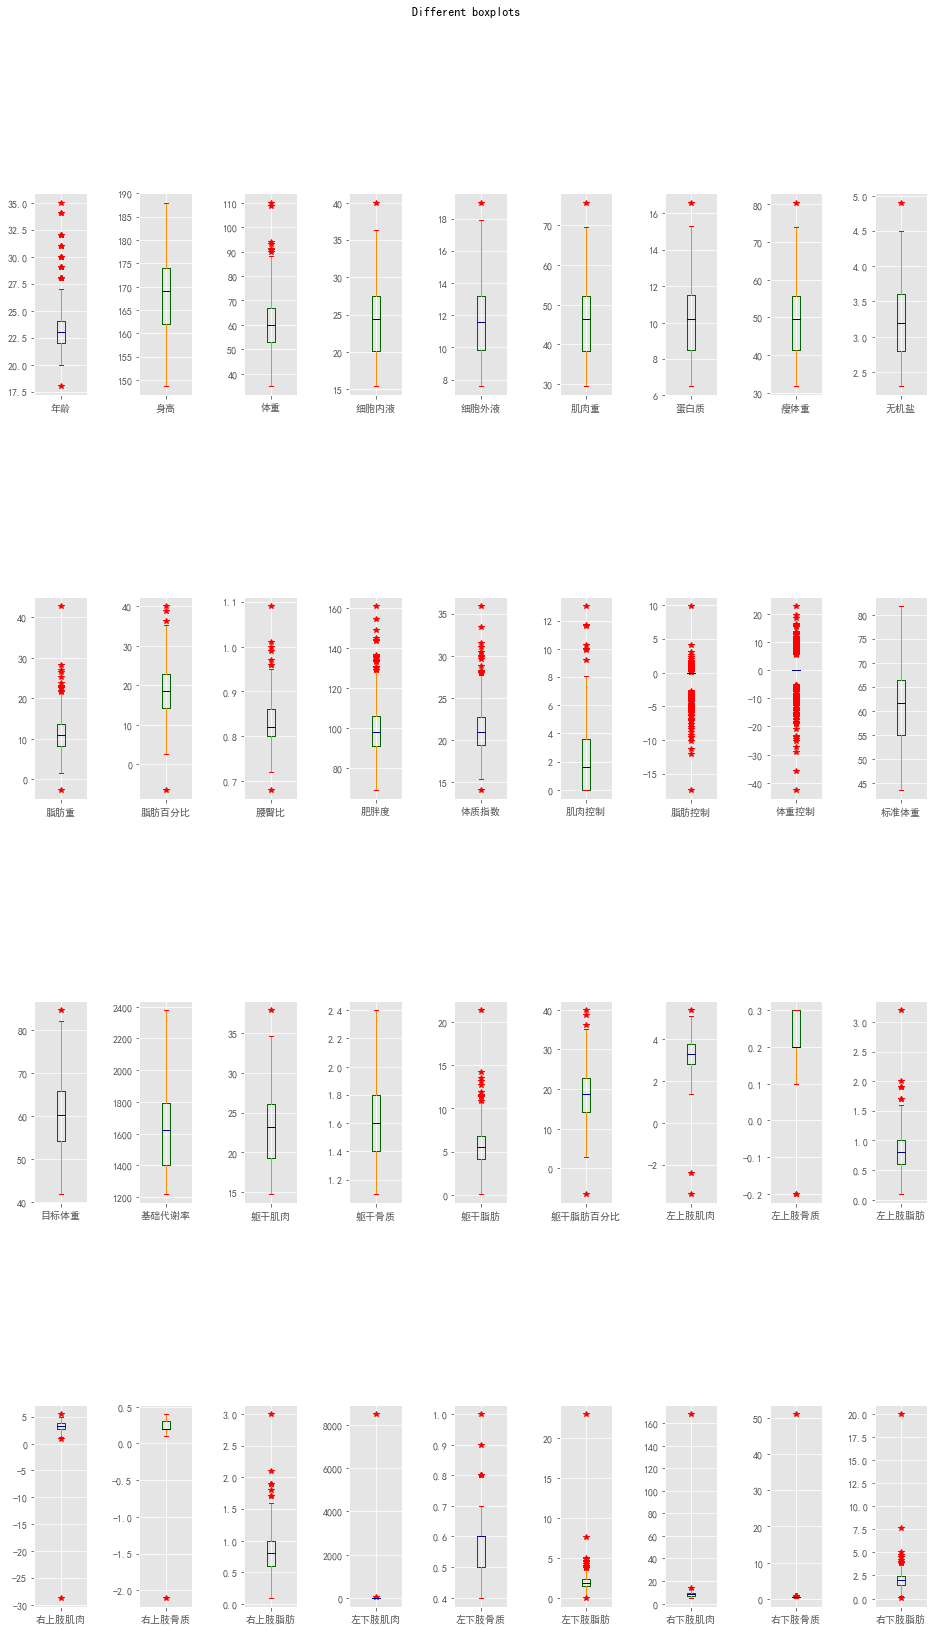

In [119]:
#箱型图
fig,axes = plt.subplots(4,9,figsize=(16, 26))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Red')
# boxes表示箱体，whisker表示触须线
# medians表示中位数，caps表示最大与最小值界限
df.plot(kind='box',ax=axes,subplots=True,
                            title='Different boxplots',color=color,sym='r*')
fig.subplots_adjust(wspace=1,hspace=1)  # 调整子图之间的间距

In [120]:
#如上图所示，很多异常值 比较明显的如：左下肢脂肪/右上肢脂肪/右下肢脂肪/右下肢肌肉/右下肢骨质/右上肢肌肉/右上肢骨质...等等
Outlier_data = df[['左下肢脂肪','右上肢脂肪','右下肢脂肪','右下肢肌肉','右下肢骨质','右上肢肌肉','右上肢骨质']] 
Outlier_data.head()

,左下肢脂肪,右上肢脂肪,右下肢脂肪,右下肢肌肉,右下肢骨质,右上肢肌肉,右上肢骨质
0,3.0,1.2,2.9,6.1,0.5,2.5,0.2
1,0.8,0.3,0.8,9.4,0.6,3.8,0.3
2,2.8,1.1,3.0,6.5,0.5,2.5,0.2
3,1.2,0.5,1.2,8.0,0.6,3.2,0.2
4,1.9,0.8,2.0,9.4,0.6,3.9,0.3


In [121]:
# 使用sklearn包里的LOF模型的检测，结果为-1是异常值，1是正常值
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20)             #n_neighbors临近距离，默认20
y_pred = clf.fit_predict(Outlier_data)
print(np.sum(y_pred == -1)) # 用LOF 检测出了 49个异常值,这仅是七列中的2列检测数
y_pred 

49


array([ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1

In [122]:
X_scores = clf.negative_outlier_factor_
X_scores #LOF得分都是负数，绝对值越大，越是outlier

array([  -1.23188981,   -1.41225051,   -1.13256113,   -0.97602099,
         -0.9793488 ,   -1.01754602,   -1.02118405,   -1.871208  ,
         -1.18359159,   -0.97409873,   -1.06029345,   -1.0071933 ,
         -0.99818871,   -1.04473021,   -1.00485551,   -1.05587487,
         -1.30120944,   -1.03162982,   -1.66264288,   -1.11874647,
         -2.32476683,   -0.96903008,   -0.98372813,   -1.02575986,
         -0.97643022,   -0.96499368,   -1.00132524,   -1.00960156,
         -0.98181875,   -0.99334601,   -1.09024757,   -1.03203196,
         -1.1549767 ,   -1.00569043,   -1.11632309,   -1.23825213,
         -0.97524548,   -1.03122484,   -1.18821527,   -0.97793326,
         -1.06165981,   -0.99909211,   -1.07410133,   -1.10742012,
         -0.98703657,   -1.07862365,   -0.96141059,   -0.98981047,
         -1.02270832,   -0.98646819,   -0.98981304,   -1.02629322,
         -0.97915694,   -1.00179566,   -0.96940076,   -2.95735908,
         -0.98975452,   -0.98843378,   -1.14150808,   -1.55198

In [123]:
#将LOF检测出的Outlier Data删除
Outlier_data['outlier'] = 1 #新建异常值标签 
for i in range(len(Outlier_data.columns)-2):
    # 循环读取每列
    Outlier_data_col = Outlier_data.iloc[:,[i,i+1]] # 得到当前列和下一列的所有行
    y_pred = clf.fit_predict(Outlier_data_col) # 用LOF拟合当前数据集
    for j in range(len(y_pred)):
        if y_pred[j] == -1: #判断Outlier所在的行
            Outlier_data.loc[j,'outlier'] = -1 #标记j行'outlier'列的值为：-1
Outlier_data.head()     

,左下肢脂肪,右上肢脂肪,右下肢脂肪,右下肢肌肉,右下肢骨质,右上肢肌肉,右上肢骨质,outlier
0,3.0,1.2,2.9,6.1,0.5,2.5,0.2,1
1,0.8,0.3,0.8,9.4,0.6,3.8,0.3,-1
2,2.8,1.1,3.0,6.5,0.5,2.5,0.2,1
3,1.2,0.5,1.2,8.0,0.6,3.2,0.2,1
4,1.9,0.8,2.0,9.4,0.6,3.9,0.3,1


In [124]:
print(Outlier_data['outlier'].value_counts()) #outlier列中各个值的数量统计
# lof 检测出的异常值有点多：176个，占数据集的1/3还多，
#本来想简单粗暴的全删掉的，琢磨琢磨还是算了，再找辙吧...

 1    312
-1    176
Name: outlier, dtype: int64


In [125]:
#将LOF检测出的Outlier Data得分先取绝对值后排序，再删除前8个
df_y = student_data['性别'] #建立预测值标签
Outlier_data['outlier'] = 1 #新建异常值得分标签
for i in range(len(Outlier_data.columns)-2):   # 循环读取每列
    Outlier_data_col = Outlier_data.iloc[:,[i,i+1]] # 得到当前列和下一列的所有行
    y_pred = clf.fit_predict(Outlier_data_col) # 用LOF拟合当前数据集
    X_scores_data = pd.DataFrame(clf.negative_outlier_factor_)#获取当前数据集LOF得分
    #先取X_scores_data的绝对值，从大到小排序，取前八
    X_scores_sort = X_scores_data.iloc[X_scores_data[0]#获取异常值的index
                                            .abs().argsort()[::-1].head(8)]
    for j in X_scores_sort.index:
        if j in df.index:
            df.drop([j],inplace=True) #删除含有异常值的行
       # elif j in df_y.index:
            df_y.drop([j],inplace=True) #删除含有异常值的行
len(df),len(df_y)

(444, 444)

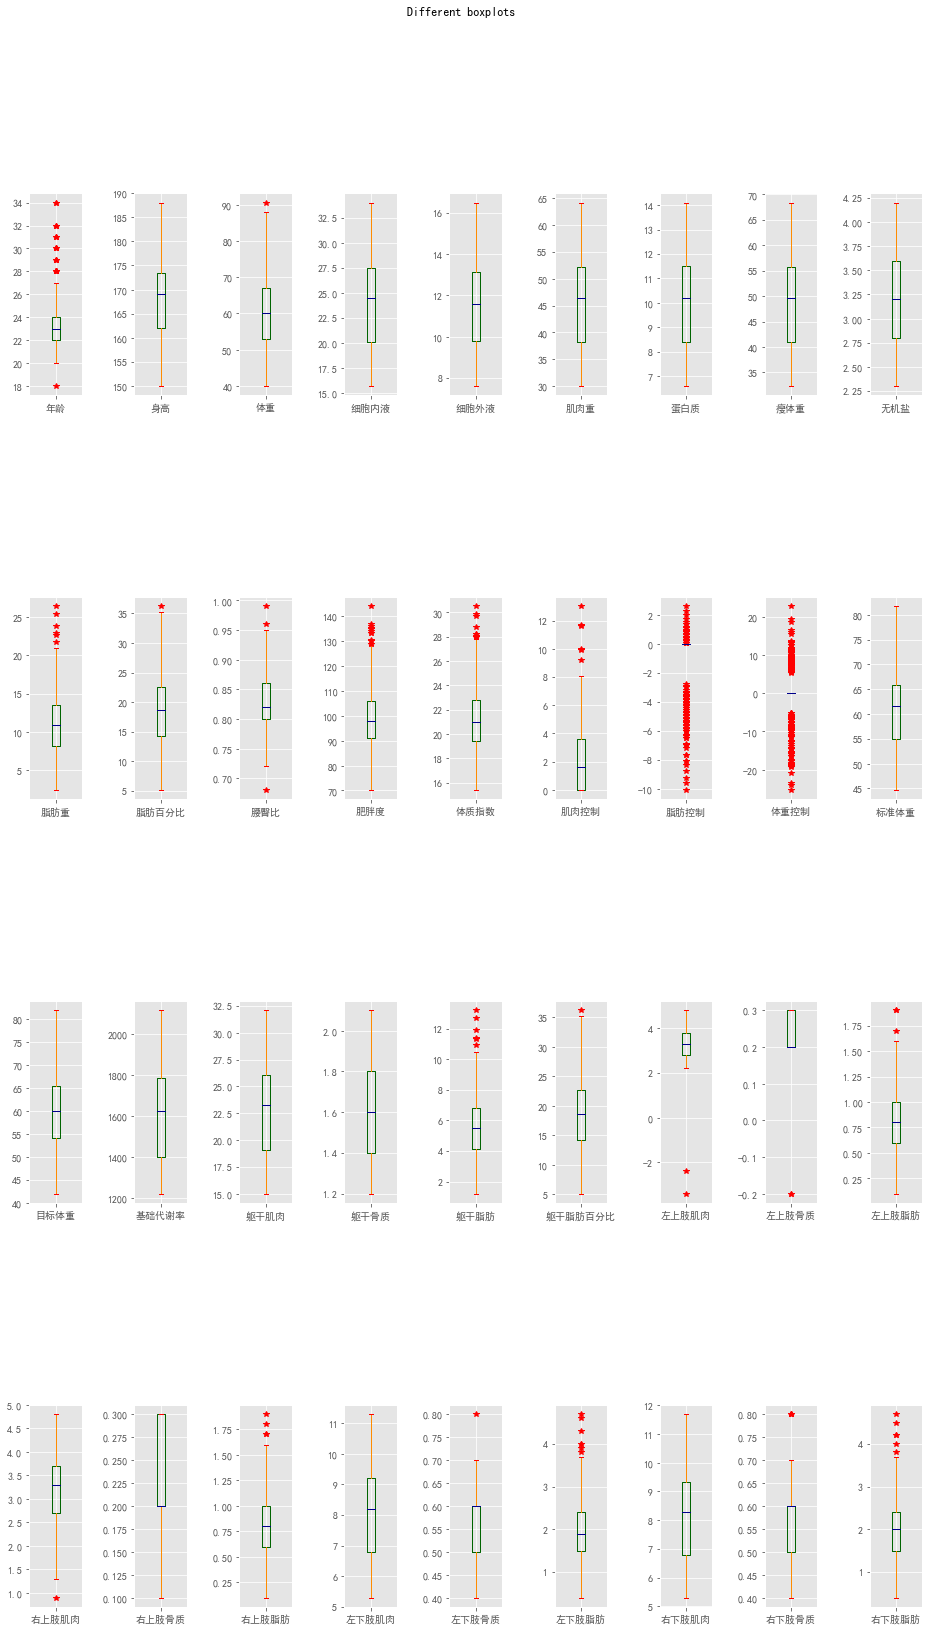

In [126]:
fig,axes = plt.subplots(4,9,figsize=(16, 26))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Red')
# boxes表示箱体，whisker表示触须线
# medians表示中位数，caps表示最大与最小值界限
df.plot(kind='box',ax=axes,subplots=True,
                            title='Different boxplots',color=color,sym='r*')
fig.subplots_adjust(wspace=1,hspace=1)  # 调整子图之间的间距

####     如上面箱型图显示，删除了LOF检测出的部分异常值后（评分前八），数据的“噪音”得到了清理。###

####   但在实际应用场景，异常检测模型是针对整体样本中的异常数据进行分析和挖掘以便找到其中的异常个案和规律，这种数据应用围绕异常值展开，因此异常值不能简单暴力的Drop处理。
========================================
### 2.数据类型转换与采样  


经过了缺失填充和去重，有了error free的数据集之后还需要做一些转换工作，比如说类型。数据类型有Continues，Discrete，Ordinal(比如优良中差), Nominal(比如rgb), :one-hot encoding。


In [127]:
df.describe() #经观测本数据集都是连续性数据，无须转换

,年龄,身高,体重,细胞内液,细胞外液,肌肉重,蛋白质,瘦体重,无机盐,脂肪重,...,左上肢脂肪,右上肢肌肉,右上肢骨质,右上肢脂肪,左下肢肌肉,左下肢骨质,左下肢脂肪,右下肢肌肉,右下肢骨质,右下肢脂肪
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,23.454955,167.963964,60.245495,24.139189,11.574099,45.784234,10.072748,48.984910,3.200225,11.260135,...,0.812613,3.278829,0.232432,0.807658,8.075000,0.563964,1.986937,8.193694,0.574099,2.016667
std,2.106691,7.445323,9.913907,4.361378,2.008735,8.148992,1.792800,8.612638,0.465394,3.979060,...,0.293993,0.609298,0.047819,0.292317,1.433958,0.088420,0.703625,1.477997,0.087505,0.712698
min,18.000000,150.000000,39.900000,15.700000,7.600000,30.000000,6.600000,32.300000,2.300000,2.400000,...,0.100000,0.900000,0.100000,0.100000,5.300000,0.400000,0.400000,5.300000,0.400000,0.400000
25%,22.000000,162.000000,53.000000,20.150000,9.800000,38.150000,8.400000,40.925000,2.800000,8.200000,...,0.600000,2.700000,0.200000,0.600000,6.800000,0.500000,1.500000,6.800000,0.500000,1.500000
50%,23.000000,169.000000,60.000000,24.500000,11.600000,46.450000,10.200000,49.650000,3.200000,10.900000,...,0.800000,3.300000,0.200000,0.800000,8.200000,0.600000,1.900000,8.300000,0.600000,2.000000
75%,24.000000,173.325000,67.000000,27.500000,13.125000,52.125000,11.500000,55.700000,3.600000,13.500000,...,1.000000,3.700000,0.300000,1.000000,9.200000,0.600000,2.400000,9.325000,0.600000,2.400000
max,34.000000,188.000000,90.600000,34.000000,16.500000,64.200000,14.100000,68.400000,4.200000,26.400000,...,1.900000,4.800000,0.300000,1.900000,11.300000,0.800000,4.700000,11.700000,0.800000,4.700000


### 三、特征选择
#### 1.主成分分析 PCA (Principal Component Analysis)

In [128]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore') #忽略警告信息；
from matplotlib import style
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False     # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
style.use('ggplot')           #matplotlib下的一种style；

In [129]:
#用sklearn库的pca模块进行主成分分析
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
x_train = scaler.transform(df)
model = pca.PCA(n_components=2).fit(x_train)
newDf = model.transform(x_train)
#explained_variance_ratio_代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。
print(model.explained_variance_ratio_)
#explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。
print(model.explained_variance_)

[0.55402766 0.31329069]
[19.99001845 11.30392415]


Text(0.5, 1.0, 'PCA降维后的散点图')

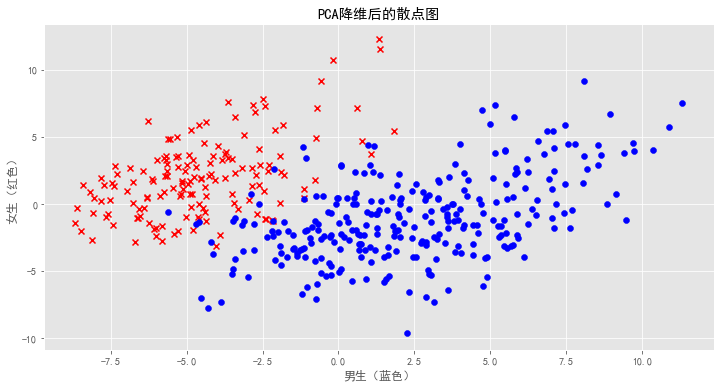

In [185]:
newDF = pd.DataFrame(newDf)
df_y = df_y.reset_index(drop=True)#重置index
newDF = pd.concat([newDF,df_y],axis=1)
red = newDF.loc[newDF['性别'] == 1] #女生用红色显示
blue = newDF.loc[newDF['性别'] == 0]#男生蓝色显示
#可视化

#plt.legend()     #显示图例；
plt.figure(figsize =(12,6)) 
plt.xlabel('男生（蓝色）')
plt.ylabel('女生（红色）')
plt.scatter(red[0],red[1],c='r',marker='x')
plt.scatter(blue[0],blue[1],c='b',marker='o')
plt.title('PCA降维后的散点图')

如上图所示，经过PCA降维后的数据（36维降到2维）已经可以清晰的分辨男女

#### 2.线性判别分析 LDA(Linear Discriminant Analysis)

线性判别分析（linear discriminant analysis），LDA。也称为Fisher线性判别（FLD）是模式识别的经典算法。

（1）中心思想：将高维的样本投影到最佳鉴别矢量空间，来达到抽取分类信息和压缩特种空间维数的效果，投影后保证样本在新的子空间有最大的类间距离和最小的类内距离。也就是说在该空间中有最佳的可分离性。

（2）与PCA的不同点：PCA主要是从特征的协方差出发，来找到比较好的投影方式，最后需要保留的特征维数可以自己选择。但是LDA更多的是考虑了类别信息，即希望投影后不同类别之间数据点的距离更大，同一类别的数据点更紧凑。


In [221]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
x_train = scaler.transform(df)
lda = LinearDiscriminantAnalysis(n_components=1)

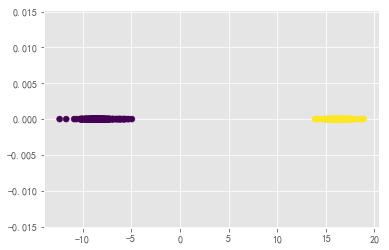

In [224]:
y = newDF.性别
lda.fit(x_train,y)
X_new = lda.transform(x_train)
X_Zero = np.zeros(X_new.shape)
plt.scatter(X_new[:, 0], X_Zero,marker='*',c=y)

如上图，LDA的分类效果明显强于PCA....
本数据集是有类别标签的（性别），属于有监督学习，因此适合用LDA来分类；如果是无监督学习PCA可以优先考虑